### Line Coding techniques and their implementations
#### Theory
Line coding is a technique used in digital communication systems to represent binary data on a transmission medium. It involves converting a sequence of binary digits (0s and 1s) into a digital signal that can be transmitted over a physical medium. Different line coding schemes are used to optimize signal transmission, minimize errors, and ensure synchronization between the transmitter and receiver. Common line coding techniques include:
* Unipolar NRZ
In Unipolar Non-Return-to-Zero (NRZ) encoding, binary 1 is represented by a high voltage level, and binary 0 is represented by a zero voltage level. The signal does not return to zero between bits, making it simple but prone to synchronization issues for long sequences of 0s or 1s.

* Polar NRZ
In Polar NRZ encoding, binary 1 is represented by a positive voltage, and binary 0 is represented by a negative voltage. This technique improves synchronization compared to Unipolar NRZ but still suffers from issues with long sequences of identical bits.

* Unipolar RZ
In Unipolar Return-to-Zero (RZ) encoding, binary 1 is represented by a high voltage level for the first half of the bit duration and returns to zero for the second half. Binary 0 is represented by a zero voltage level throughout the bit duration. This technique provides better synchronization but requires more bandwidth.

* Polar RZ
In Polar RZ encoding, binary 1 is represented by a positive voltage for the first half of the bit duration and returns to zero for the second half. Binary 0 is represented by a negative voltage for the first half of the bit duration and returns to zero for the second half. This technique improves synchronization and reduces DC bias.

* Split-Phase (Manchester)
In Split-Phase or Manchester encoding, each bit is represented by a transition in the middle of the bit duration. Binary 1 is represented by a high-to-low transition, and binary 0 is represented by a low-to-high transition. This technique ensures synchronization and eliminates DC bias but requires higher bandwidth. 

#### Objectives
The objective of this lab is to:
1. Understand the principles of line coding and its importance in digital communication.
2. Implement various line coding techniques such as Unipolar NRZ, Polar NRZ, Unipolar RZ, Polar RZ, and Split-Phase (Manchester) encoding.
3. Visualize the encoded signals for a given binary data sequence.
4. Analyze the characteristics and differences between the line coding schemes.

In [106]:
import matplotlib.pyplot as plt
import numpy as np

In [107]:
def unipolar_nrz(data, sampling_rate=100, duration=1):
    time = np.arange(0, len(data) * duration, duration / sampling_rate)
    signal = np.zeros_like(time)
    for i, bit in enumerate(data):
        start = int(i * sampling_rate)
        end = int((i + 1) * sampling_rate)
        signal[start:end] = bit
    return time, signal

In [108]:
def polar_nrz(data, sampling_rate=100, duration=1):
    time = np.arange(0, len(data) * duration, duration / sampling_rate)
    signal = np.zeros_like(time)
    for i, bit in enumerate(data):
        start = int(i  * sampling_rate)
        end = int((i + 1) * sampling_rate)
        signal[start:end] = 1 if bit==1 else -1
    return time, signal

In [109]:
def unipolar_rz(data, sampling_rate=100, duration=1):
    time = np.arange(0, len(data) * duration, duration / sampling_rate)
    signal = np.zeros_like(time)
    for i, bit in enumerate(data):
        start = int(i  * sampling_rate)
        end = int((i + 1) * sampling_rate)
        signal[start : start + (end - start) // 2] = bit
    return time, signal

In [110]:
def polar_rz(data, sampling_rate=100, duration=1):
    time = np.arange(0, len(data) * duration, duration / sampling_rate)
    signal = np.zeros_like(time)
    for i, bit in enumerate(data):
        start = int(i * sampling_rate)
        end = int((i + 1) * sampling_rate)
        signal[start : start + (end - start) // 2] = 1 if bit==1 else -1
    return time, signal

In [111]:
def split_phase(data, sampling_rate=100, duration=1):
    time = np.arange(0, len(data) * duration, duration / sampling_rate)
    signal = np.zeros_like(time)
    for i, bit in enumerate(data):
        start = int(i * sampling_rate)
        end = int((i + 1) * sampling_rate)
        signal[start : start + (end - start) // 2] = bit
        signal[start + (end - start) // 2 : end] = 1 - bit
    return time, signal

array([1, 0, 1, 1, 0, 0, 0, 1])

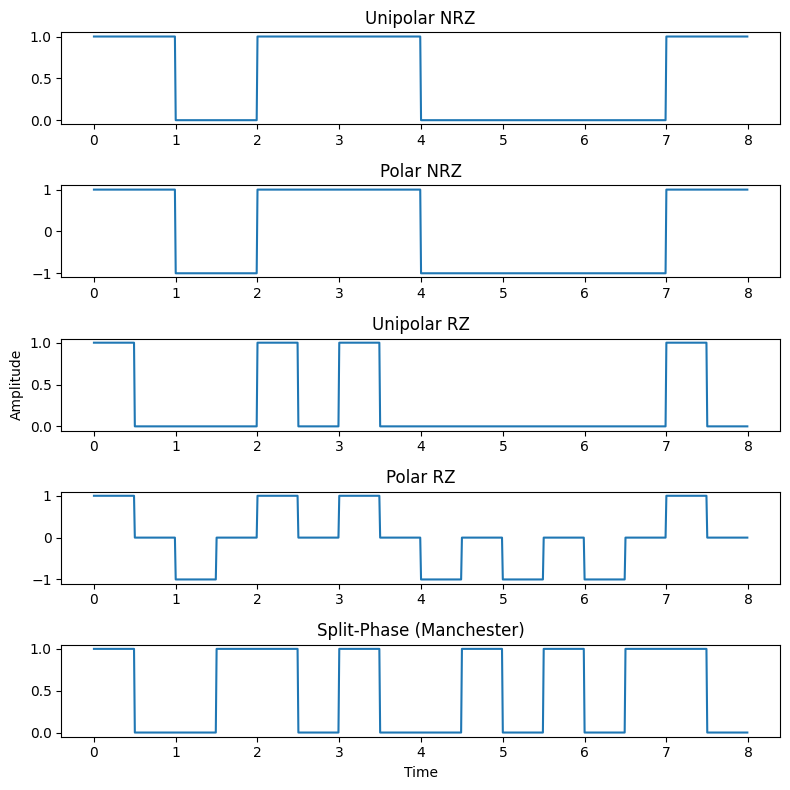

In [112]:
data = np.random.randint(0, 2, 8)

plt.figure(figsize=(8, 8))

plt.subplot(5, 1, 1)
time, signal = unipolar_nrz(data)
plt.plot(time, signal)
plt.title("Unipolar NRZ")

plt.subplot(5, 1, 2)
time, signal = polar_nrz(data)
plt.plot(time, signal)
plt.title("Polar NRZ")

plt.subplot(5, 1, 3)
time, signal = unipolar_rz(data)
plt.plot(time, signal)
plt.ylabel("Amplitude")
plt.title("Unipolar RZ")

plt.subplot(5, 1, 4)
time, signal = polar_rz(data)
plt.plot(time, signal)
plt.title("Polar RZ")

plt.subplot(5, 1, 5)
time, signal = split_phase(data)
plt.plot(time, signal)
plt.title("Split-Phase (Manchester)")
plt.xlabel("Time")

plt.tight_layout()
data